In [1]:
import sys
import os
path = os.getcwd()
sys.path.insert(1, path[:-4])

In [2]:
import warnings
warnings.filterwarnings('ignore')
# %matplotlib notebook 

In [3]:
from core.subgraph_specializer import Graph
import numpy as np
from importlib import reload
import networkx as nx
import matplotlib.pyplot as plt
import time
import autograd.numpy as anp
import networkx as nx
import scipy.linalg as la

In [4]:
def doubling(x):
    return 2*x % 1

def lin1(x):
    return .1*x

def lin2(x):
    return (1/3) * x

def sig1(x):
    return anp.tanh(x)

def sig2(x):
    return 2*anp.tanh(x)

def iden(x):
    return x

def zero(x):
    return 0*x

def fun1(x):
    return 1/8 * x**2

def per1(x):
    return anp.sin(x)

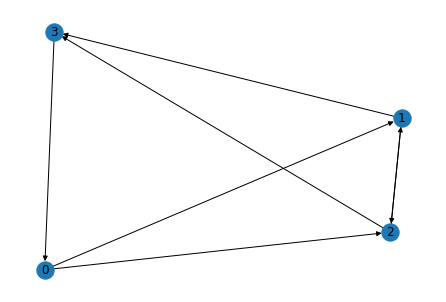

In [15]:
A = np.array([
    [0,0,0,1],
    [1,0,1,0],
    [1,1,0,0],
    [0,1,1,0]
])

f = np.array([
    [sig1,zero,zero,lin1],
    [lin1,sig2,lin1,zero],
    [lin1,lin2,sig2,zero],
    [zero,lin1,lin1,sig1]
])

labels = ['1','2','3','4']
nx.draw(nx.DiGraph(A.T), with_labels=True)

0.18257418583505539


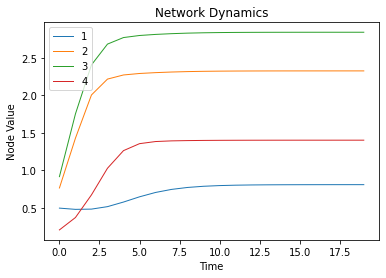

In [16]:
G = Graph(A,labels=labels,F=f)
# print(G.stability_matrix()[1:3,:][:,1:3])
print(np.max(np.abs(la.eig(G.stability_matrix()[1:3,:][:,1:3])[0])))
k = G.iterate(20,np.random.random(G.n),graph=True,title='ex:sync1.pdf',save=True)

0.7459997764183148


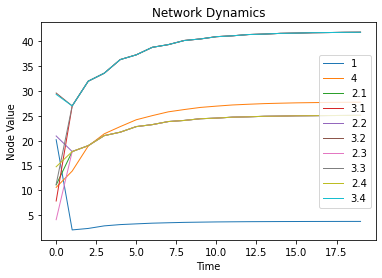

In [17]:
G = Graph(A,labels=labels,F=f)
base = [0,3]
G = G.specialize(base)
print(G.spectral_radius())
k = G.iterate(20,30*np.random.random(G.n),graph=True,title='ex:sync2.pdf', save=True)

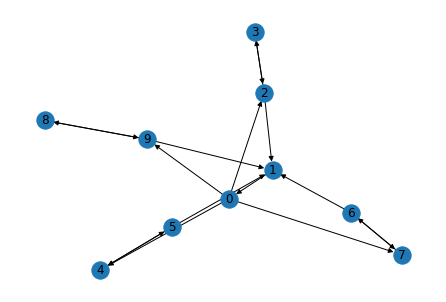

In [8]:
nx.draw(nx.DiGraph(G.A.T), with_labels=True)